In [1]:
import numpy as npimport pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("D:\mlprojectdata.xlsx")
df

,type,title,director,cast,country,date_added,release_year,IMDB_Rating,duration,Genre,description,review
0,Movie,Act of Vengeance,Mahsun Kirmizigül,"Haluk Bilginer, Mahsun Kirmizigül, Mustafa San...","Turkey, United States",2018-09-29 00:00:00,2010,8.1,112 min,Action-adventure,Two Turkish agents are sent to New York City o...,I saw Brother's Shadow at the Tribeca Film Fes...
1,Movie,Action Replayy,Vipul Amrutlal Shah,"Akshay Kumar, Aishwarya Rai Bachchan, Om Puri,...",India,2020-05-11 00:00:00,2010,8.1,129 min,Comedy,"Sick of his parents’ constant squabbling, a yo...","""Mararía"" really disappointed me. I can't cons..."
2,Movie,Acts of Vengeance,Isaac Florentine,"Antonio Banderas, Karl Urban, Paz Vega, Robert...","Bulgaria, United States",2018-01-25 00:00:00,2017,8.1,87 min,Action-adventure,Devastated by the murder of his wife and child...,Serum is about a crazy doctor that finds a ser...
3,Movie,Acts of Violence,Brett Donowho,"Cole Hauser, Bruce Willis, Shawn Ashmore, Asht...",Canada,2020-08-01 00:00:00,2018,8.1,87 min,Action-adventure,When his future sister-in-law is kidnapped by ...,witty. funny. intelligent. awesome. i was flip...
4,TV Show,Ad Vitam,NaN,"Yvan Attal, Garance Marillier, Niels Schneider...",France,2019-11-01 00:00:00,2018,8.1,1 Season,Drama,In a future where regeneration technology lets...,"It's a unique film, as it gives us our only ch..."
...,...,...,...,...,...,...,...,...,...,...,...,...
994,TV Show,Cheese in the Trap,Lee Yoon-jung,"Park Hae-Jin, Kim Go-eun, Seo Kang-jun, Lee Su...",South Korea,2019-10-01 00:00:00,2016,8.1,1 Season,Romance,"In this adaptation of a popular webtoon, a poo...",This little two-person movie is actually much ...
995,Movie,Chef,Jon Favreau,"Jon Favreau, Sofía Vergara, John Leguizamo, Sc...",United States,2020-12-01 00:00:00,2014,8.1,115 min,Comedy,After igniting a Twitter war with a well-known...,UK newspaper reviews seem to have concentrated...
996,TV Show,Chef & My Fridge,NaN,"Seong-joo Kim?, Jung-hwan Ahn",South Korea,"August 4, 2017",2017,8.1,2 Seasons,Reality TV,The best chefs of Korea go head-to-head to cre...,Alien Hunter 5 out of 10 Is it me or does ever...
997,TV Show,Chef's Table,NaN,NaN,United States,2019-02-22 00:00:00,2019,8.1,6 Seasons,Documentary,"In this Emmy-nominated Documentary, find out w...",I have a hard time putting into words just how...


## DATA EXPLORING

In [3]:
df.head()

,type,title,director,cast,country,date_added,release_year,IMDB_Rating,duration,Genre,description,review
0,Movie,Act of Vengeance,Mahsun Kirmizigül,"Haluk Bilginer, Mahsun Kirmizigül, Mustafa San...","Turkey, United States",2018-09-29 00:00:00,2010,8.1,112 min,Action-adventure,Two Turkish agents are sent to New York City o...,I saw Brother's Shadow at the Tribeca Film Fes...
1,Movie,Action Replayy,Vipul Amrutlal Shah,"Akshay Kumar, Aishwarya Rai Bachchan, Om Puri,...",India,2020-05-11 00:00:00,2010,8.1,129 min,Comedy,"Sick of his parents’ constant squabbling, a yo...","""Mararía"" really disappointed me. I can't cons..."
2,Movie,Acts of Vengeance,Isaac Florentine,"Antonio Banderas, Karl Urban, Paz Vega, Robert...","Bulgaria, United States",2018-01-25 00:00:00,2017,8.1,87 min,Action-adventure,Devastated by the murder of his wife and child...,Serum is about a crazy doctor that finds a ser...
3,Movie,Acts of Violence,Brett Donowho,"Cole Hauser, Bruce Willis, Shawn Ashmore, Asht...",Canada,2020-08-01 00:00:00,2018,8.1,87 min,Action-adventure,When his future sister-in-law is kidnapped by ...,witty. funny. intelligent. awesome. i was flip...
4,TV Show,Ad Vitam,NaN,"Yvan Attal, Garance Marillier, Niels Schneider...",France,2019-11-01 00:00:00,2018,8.1,1 Season,Drama,In a future where regeneration technology lets...,"It's a unique film, as it gives us our only ch..."


In [4]:
df.tail()

,type,title,director,cast,country,date_added,release_year,IMDB_Rating,duration,Genre,description,review
994,TV Show,Cheese in the Trap,Lee Yoon-jung,"Park Hae-Jin, Kim Go-eun, Seo Kang-jun, Lee Su...",South Korea,2019-10-01 00:00:00,2016,8.1,1 Season,Romance,"In this adaptation of a popular webtoon, a poo...",This little two-person movie is actually much ...
995,Movie,Chef,Jon Favreau,"Jon Favreau, Sofía Vergara, John Leguizamo, Sc...",United States,2020-12-01 00:00:00,2014,8.1,115 min,Comedy,After igniting a Twitter war with a well-known...,UK newspaper reviews seem to have concentrated...
996,TV Show,Chef & My Fridge,NaN,"Seong-joo Kim?, Jung-hwan Ahn",South Korea,"August 4, 2017",2017,8.1,2 Seasons,Reality TV,The best chefs of Korea go head-to-head to cre...,Alien Hunter 5 out of 10 Is it me or does ever...
997,TV Show,Chef's Table,NaN,NaN,United States,2019-02-22 00:00:00,2019,8.1,6 Seasons,Documentary,"In this Emmy-nominated Documentary, find out w...",I have a hard time putting into words just how...
998,TV Show,Chef's Table: BBQ,NaN,NaN,United States,2020-09-02 00:00:00,2020,8.1,1 Season,Documentary,The Emmy-nominated series delves into the juic...,I love this young people trapped in a house of...


In [5]:
df.shape

(999, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          999 non-null    object 
 1   title         999 non-null    object 
 2   director      704 non-null    object 
 3   cast          914 non-null    object 
 4   country       937 non-null    object 
 5   date_added    998 non-null    object 
 6   release_year  999 non-null    int64  
 7   IMDB_Rating   999 non-null    float64
 8   duration      999 non-null    object 
 9   Genre         999 non-null    object 
 10  description   999 non-null    object 
 11  review        999 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 93.8+ KB


In [7]:
df.describe()

,release_year,IMDB_Rating
count,999.000000,999.000000
mean,2014.058058,7.951552
std,8.352134,0.275585
min,1958.000000,7.600000
25%,2014.000000,7.700000
50%,2017.000000,7.900000
75%,2018.000000,8.100000
max,2021.000000,9.300000


In [8]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'IMDB_Rating', 'duration', 'Genre', 'description',
       'review'],
      dtype='object')

In [9]:
df.dtypes

type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
IMDB_Rating     float64
duration         object
Genre            object
description      object
review           object
dtype: object

## DATA PREPROCESSING

In [10]:
df.isnull().sum()

type              0
title             0
director        295
cast             85
country          62
date_added        1
release_year      0
IMDB_Rating       0
duration          0
Genre             0
description       0
review            0
dtype: int64

In [11]:
df['director'].fillna(value = 0 , inplace = True)

In [12]:
df['cast'].fillna(value = 0 , inplace = True)

In [13]:
df['country'].fillna(value = 0 , inplace = True)

In [14]:
df['date_added'].fillna(value = 0 , inplace = True)

In [15]:
df['title'].fillna(value = 0 , inplace = True)

In [16]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
IMDB_Rating     0
duration        0
Genre           0
description     0
review          0
dtype: int64

 ## DATA VISUALIZATION

In [17]:
print(df['IMDB_Rating'].value_counts())

7.7    157
7.8    143
8.0    141
8.1    134
7.6    123
7.9    106
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.8      5
8.7      5
9.0      3
8.9      3
9.2      1
9.3      1
Name: IMDB_Rating, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '7.6'),
  Text(1, 0, '7.7'),
  Text(2, 0, '7.8'),
  Text(3, 0, '7.9'),
  Text(4, 0, '8.0'),
  Text(5, 0, '8.1'),
  Text(6, 0, '8.2'),
  Text(7, 0, '8.3'),
  Text(8, 0, '8.4'),
  Text(9, 0, '8.5'),
  Text(10, 0, '8.6'),
  Text(11, 0, '8.7'),
  Text(12, 0, '8.8'),
  Text(13, 0, '8.9'),
  Text(14, 0, '9.0'),
  Text(15, 0, '9.2'),
  Text(16, 0, '9.3')])

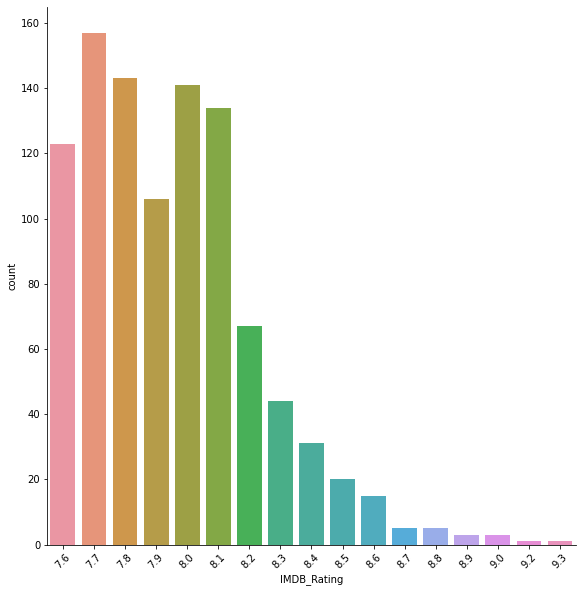

In [18]:
sns.factorplot('IMDB_Rating',kind='count',data=df, size=8)
plt.xticks(rotation=45)

In [19]:
df['IMDB_Rating'].max()

9.3

In [20]:
df['IMDB_Rating'].min()

7.6

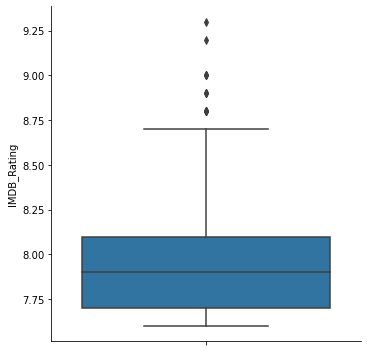

In [21]:
sns.factorplot(y='IMDB_Rating',kind='box',data=df)

In [22]:
tmp = df['country'].value_counts()
country_list = tmp[tmp>3].index.tolist()

###  IMDB_Rating VS Country

<Figure size 1008x432 with 0 Axes>

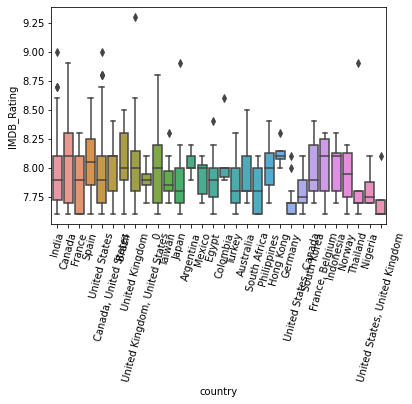

<Figure size 1008x432 with 0 Axes>

In [23]:
sns.boxplot(y='IMDB_Rating',x='country',data=df[df['country'].isin(country_list)])
plt.xticks(rotation=75)
plt.figure(figsize=(14,6))

 ### IMDB_Rating vs Release year

In [24]:
release_year_df = df[['release_year','IMDB_Rating']]

release_year_df = release_year_df.dropna()
release_year_df['release_year'] =release_year_df['release_year'].astype(int)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, '1958'),
  Text(1, 0, '1960'),
  Text(2, 0, '1966'),
  Text(3, 0, '1967'),
  Text(4, 0, '1972'),
  Text(5, 0, '1973'),
  Text(6, 0, '1974'),
  Text(7, 0, '1975'),
  Text(8, 0, '1976'),
  Text(9, 0, '1977'),
  Text(10, 0, '1978'),
  Text(11, 0, '1979'),
  Text(12, 0, '1980'),
  Text(13, 0, '1981'),
  Text(14, 0, '1982'),
  Text(15, 0, '1986'),
  Text(16, 0, '1989'),
  Text(17, 0, '1990'),
  Text(18, 0, '1991'),
  Text(19, 0, '1992'),
  Text(20, 0, '1993'),
  Text(21, 0, '1994'),
  Text(22, 0, '1995'),
  Text(23, 0, '1996'),
  Text(24, 0, '1997'),
  Text(25, 0, '1998'),
  Text(26, 0, '1999'),
  Text(27, 0, '2000'),
  Text(28, 0, '2001'),
  Text(29, 0, '2002'),
  Text(30, 0, '2003'),
  Text(31, 0, '2004'),
  Text(32, 0, '2005'),
  Text(33, 0, '2006'),
  Text

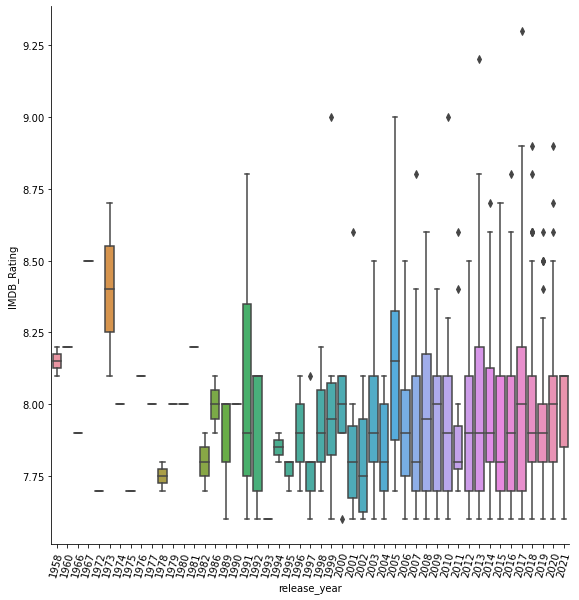

In [25]:
sns.factorplot(y='IMDB_Rating',x='release_year',data=release_year_df,kind='box', size=8)
plt.xticks(rotation=75)

### Genre count plot

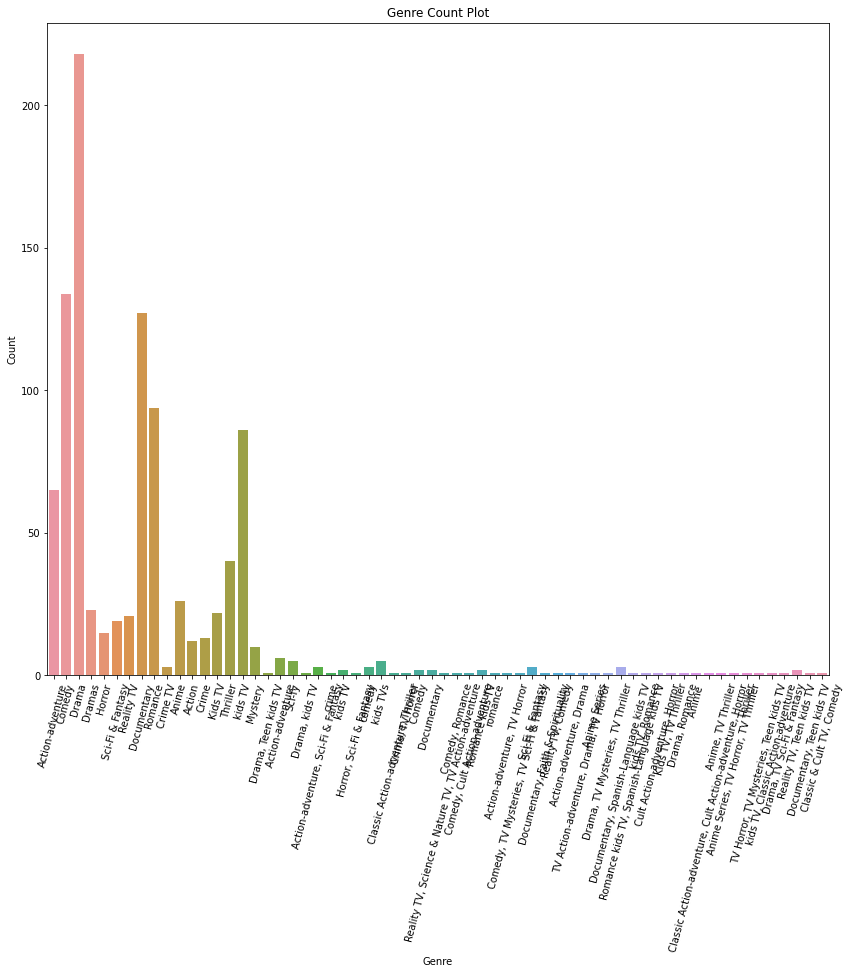

In [26]:

plt.figure(figsize=(14,12))
sns.countplot(x='Genre', data=df)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Count Plot')
plt.xticks(rotation=75)
plt.show()

In [27]:
columns = df.columns
discrete = []
continuous = []
for i in columns:
    if df[i].dtype =='object':
        discrete.append(i)
    else:
        continuous.append(i)

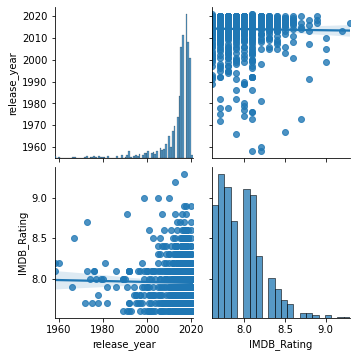

In [28]:
sns.pairplot(df[continuous].dropna(),kind="reg")

In [29]:
df_corr = df[continuous].dropna().corr()

<AxesSubplot:>

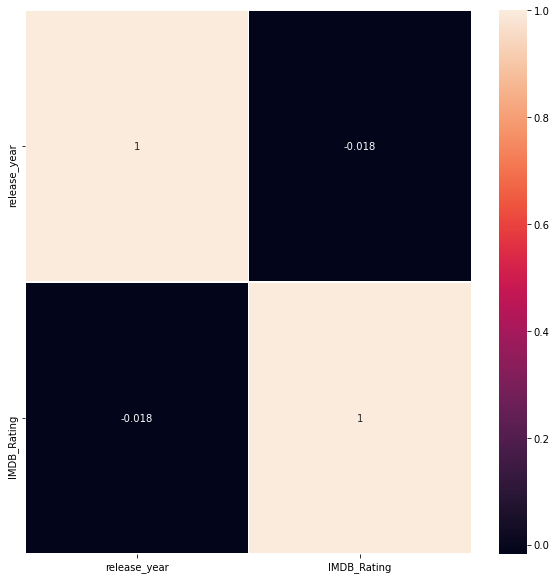

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr,
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values,
           annot=True, linewidths=.5, ax=ax)

In [31]:
final_df=df[['type','title','description','release_year','Genre','IMDB_Rating','review' ]]
final_df

,type,title,description,release_year,Genre,IMDB_Rating,review
0,Movie,Act of Vengeance,Two Turkish agents are sent to New York City o...,2010,Action-adventure,8.1,I saw Brother's Shadow at the Tribeca Film Fes...
1,Movie,Action Replayy,"Sick of his parents’ constant squabbling, a yo...",2010,Comedy,8.1,"""Mararía"" really disappointed me. I can't cons..."
2,Movie,Acts of Vengeance,Devastated by the murder of his wife and child...,2017,Action-adventure,8.1,Serum is about a crazy doctor that finds a ser...
3,Movie,Acts of Violence,When his future sister-in-law is kidnapped by ...,2018,Action-adventure,8.1,witty. funny. intelligent. awesome. i was flip...
4,TV Show,Ad Vitam,In a future where regeneration technology lets...,2018,Drama,8.1,"It's a unique film, as it gives us our only ch..."
...,...,...,...,...,...,...,...
994,TV Show,Cheese in the Trap,"In this adaptation of a popular webtoon, a poo...",2016,Romance,8.1,This little two-person movie is actually much ...
995,Movie,Chef,After igniting a Twitter war with a well-known...,2014,Comedy,8.1,UK newspaper reviews seem to have concentrated...
996,TV Show,Chef & My Fridge,The best chefs of Korea go head-to-head to cre...,2017,Reality TV,8.1,Alien Hunter 5 out of 10 Is it me or does ever...
997,TV Show,Chef's Table,"In this Emmy-nominated Documentary, find out w...",2019,Documentary,8.1,I have a hard time putting into words just how...


In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          999 non-null    object 
 1   title         999 non-null    object 
 2   description   999 non-null    object 
 3   release_year  999 non-null    int64  
 4   Genre         999 non-null    object 
 5   IMDB_Rating   999 non-null    float64
 6   review        999 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [33]:
print(final_df.shape)
print(final_df.describe())

(999, 7)
       release_year  IMDB_Rating
count    999.000000   999.000000
mean    2014.058058     7.951552
std        8.352134     0.275585
min     1958.000000     7.600000
25%     2014.000000     7.700000
50%     2017.000000     7.900000
75%     2018.000000     8.100000
max     2021.000000     9.300000


In [34]:
final_df.describe()


,release_year,IMDB_Rating
count,999.000000,999.000000
mean,2014.058058,7.951552
std,8.352134,0.275585
min,1958.000000,7.600000
25%,2014.000000,7.700000
50%,2017.000000,7.900000
75%,2018.000000,8.100000
max,2021.000000,9.300000


## LABEL ENCODING

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
final_df['title'] = label_encoder.fit_transform(df['title'])
final_df['type'] = label_encoder.fit_transform(df['type'])
final_df['description'] = label_encoder.fit_transform(df['description'])
final_df['Genre'] =label_encoder.fit_transform(df['Genre'])
final_df['IMDB_Rating'] =label_encoder.fit_transform(df['IMDB_Rating'])
final_df['review'] =label_encoder.fit_transform(df['review'])
final_df['release_year'] =label_encoder.fit_transform(df['release_year'])
final_df

,type,title,description,release_year,Genre,IMDB_Rating,review
0,0,11,860,37,7,5,350
1,0,12,693,37,19,5,10
2,0,13,399,44,7,5,618
3,0,14,928,45,7,5,934
4,1,15,535,45,31,5,482
...,...,...,...,...,...,...,...
994,1,989,566,43,47,5,770
995,0,990,218,41,19,5,845
996,1,991,734,44,43,5,69
997,1,992,564,46,27,5,296


In [36]:
x = final_df.drop(['review'],axis = 1)
y = final_df.IMDB_Rating

## Spliting the data into Training-Set and Testing-set

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 1)

## CLASSIFICATION ALGORITHMS AND PERFORMANCE MEASUREMENTS

In [38]:
#Logistic Regression


from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg =  LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(logreg.score(x_test, y_test))

0.55


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg =  LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
print(linreg.score(x_test, y_test))

1.0


In [40]:
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 3)
nn = KNeighborsClassifier()
model = nn.fit(x_train, y_train)
prediction = model.predict(x_test)
accuracy_score(y_test, prediction, normalize = True)

0.82

In [41]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
model = XGBRegressor(n_estimators=200, max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = model.score(x_train, y_train)
print('Training Score:', score)
score = model.score(x_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':y_pred})

Training Score: 0.9999999962757236
Testing Score: 0.9999679941672427


# SENTIMENT ANALYSIS

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # for regex
from nltk.corpus import stopwords
import nltk 
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91830\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91830\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
data = pd.read_excel("D:\imdb_reviews2.xlsx")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
994,"On watching this film, I was amazed at how med...",positive
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive
996,I hated it. I hate self-aware pretentious inan...,negative
997,I usually try to be professional and construct...,negative


In [44]:
print(data.shape)
data.head()

(999, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [46]:
data.sentiment.value_counts()

positive    501
negative    498
Name: sentiment, dtype: int64

In [47]:
data.sentiment.replace('positive',1,inplace=True)
data.sentiment.replace('negative',0,inplace=True)
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [48]:
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

## Remove unecessary characters

In [49]:
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

data.review = data.review.apply(clean)
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

 ## Remove special characters

In [50]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

## Convert everything to lowercase

In [51]:
def to_lower(text):
    return text.lower()

data.review = data.review.apply(to_lower)
data.review[0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

 ## Remove stopwords

In [52]:
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

data.review = data.review.apply(rem_stopwords)
data.review[0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 "'ll",
 'hooked',
 '.',
 'right',
 ',',
 'exactly',
 'happened',
 'me.the',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 ',',
 'set',
 'right',
 'word',
 'go',
 '.',
 'trust',
 ',',
 'show',
 'faint',
 'hearted',
 'timid',
 '.',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 ',',
 'sex',
 'violence',
 '.',
 'hardcore',
 ',',
 'classic',
 'use',
 'word.it',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 '.',
 'focuses',
 'mainly',
 'emerald',
 'city',
 ',',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 ',',
 'privacy',
 'high',
 'agenda',
 '.',
 'em',
 'city',
 'home',
 'many',
 '..',
 'aryans',
 ',',
 'muslims',
 ',',
 'gangstas',
 ',',
 'latinos',
 ',',
 'christians',
 ',',
 'italians',
 ',',
 'irish',
 '....',
 'scuffles',
 ',',
 'death',
 'stares',
 ','

## Stem the words

In [53]:
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

data.review = data.review.apply(stem_txt)
data.review[0]

"one review mention watch 1 oz episod ll hook . right , exact happen me.th first thing struck oz brutal unflinch scene violenc , set right word go . trust , show faint heart timid . show pull punch regard drug , sex violenc . hardcor , classic use word.it call oz nicknam given oswald maximum secur state penitentari . focus main emerald citi , experiment section prison cell glass front face inward , privaci high agenda . em citi home mani .. aryan , muslim , gangsta , latino , christian , italian , irish .... scuffl , death stare , dodgi deal shadi agreement never far away.i would say main appeal show due fact goe show would n't dare . forget pretti pictur paint mainstream audienc , forget charm , forget romanc ... oz n't mess around . first episod ever saw struck nasti surreal , could n't say readi , watch , develop tast oz , got accustom high level graphic violenc . violenc , injustic ( crook guard ll sold nickel , inmat ll kill order get away , well manner , middl class inmat turn pr

In [54]:
data.head()

,review,sentiment
0,one review mention watch 1 oz episod ll hook ....,1
1,wonder littl product . film techniqu unassumin...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic 's famili littl boy ( jake ) think 's zo...,0
4,petter mattei 's `` love time money '' visual ...,1


In [55]:
X = np.array(data.iloc[:,0].values)
y = np.array(data.sentiment.values)
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(data.review).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (999, 1000)
y.shape =  (999,)


In [56]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]
 [2 0 1 ... 0 0 0]]


## Train test split

In [57]:
trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.2,random_state=9)
print("Train shapes : X = {}, y = {}".format(trainx.shape,trainy.shape))
print("Test shapes : X = {}, y = {}".format(testx.shape,testy.shape))

Train shapes : X = (799, 1000), y = (799,)
Test shapes : X = (200, 1000), y = (200,)


## Defining the models and Training them

In [58]:
gnb,mnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),
gnb.fit(trainx,trainy)
mnb.fit(trainx,trainy)


MultinomialNB()

## Prediction and accuracy metrics to choose best model

In [59]:
ypg = gnb.predict(testx)
ypm = mnb.predict(testx)


print("Gaussian = ",accuracy_score(testy,ypg))
print("Multinomial = ",accuracy_score(testy,ypm))


Gaussian =  0.685
Multinomial =  0.785
